## Prepare the tools

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve,accuracy_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-dark')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the rookies dataset
original_dataset = pd.read_excel("/content/drive/My Drive/nbadata.xlsx")
rookies = original_dataset[original_dataset["Year Drafted"] < 2016]
rookies.index = range(0, len(rookies.index)) 
rookies.head()

,Name,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,Karl-Anthony Towns,2015,82,32.0,18.3,7.6,14.1,54.2,0.4,1.1,34.1,2.7,3.4,81.1,2.8,7.7,10.5,2.0,0.7,1.7,2.2,23.8
1,Emmanuel Mudiay,2015,68,30.4,12.8,4.8,13.3,36.4,1.1,3.4,31.9,2.1,3.1,67.0,0.5,2.9,3.4,5.5,1.0,0.5,3.2,10.5
2,Jahlil Okafor,2015,53,30.0,17.5,7.5,14.7,50.8,0.0,0.1,16.7,2.5,3.7,68.6,2.3,4.7,7.0,1.2,0.4,1.1,2.3,16.6
3,Justise Winslow,2015,78,28.6,6.4,2.5,5.9,42.2,0.4,1.5,27.6,1.0,1.5,68.4,1.0,4.1,5.2,1.5,0.9,0.3,1.2,9.2
4,Kristaps Porzingis,2015,72,28.4,14.3,5.2,12.3,42.1,1.1,3.4,33.3,2.8,3.3,83.8,1.8,5.5,7.3,1.3,0.7,1.9,1.7,16.1


In [ ]:
rookies

,Name,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,Karl-Anthony Towns,2015,82,32.0,18.3,7.6,14.1,54.2,0.4,1.1,34.1,2.7,3.4,81.1,2.8,7.7,10.5,2.0,0.7,1.7,2.2,23.8
1,Emmanuel Mudiay,2015,68,30.4,12.8,4.8,13.3,36.4,1.1,3.4,31.9,2.1,3.1,67.0,0.5,2.9,3.4,5.5,1.0,0.5,3.2,10.5
2,Jahlil Okafor,2015,53,30.0,17.5,7.5,14.7,50.8,0.0,0.1,16.7,2.5,3.7,68.6,2.3,4.7,7.0,1.2,0.4,1.1,2.3,16.6
3,Justise Winslow,2015,78,28.6,6.4,2.5,5.9,42.2,0.4,1.5,27.6,1.0,1.5,68.4,1.0,4.1,5.2,1.5,0.9,0.3,1.2,9.2
4,Kristaps Porzingis,2015,72,28.4,14.3,5.2,12.3,42.1,1.1,3.4,33.3,2.8,3.3,83.8,1.8,5.5,7.3,1.3,0.7,1.9,1.7,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,Billy Reid,1980,59,10.1,3.2,1.4,3.1,45.4,0.0,0.1,0,0.4,0.7,56.4,0.5,0.6,1.0,1.2,0.6,0.1,1.3,2.8
1502,Jerry Sichting,1980,47,9.6,2.0,0.7,2.0,35.8,0.0,0.1,0,0.5,0.7,78.1,0.2,0.7,0.9,1.5,0.5,0.0,0.6,2.9
1503,Reggie Carter,1980,60,8.9,2.8,1.0,3.0,33.0,0.0,0.1,0,0.9,1.2,73.9,0.5,0.7,1.2,1.3,0.4,0.0,0.6,2.7
1504,Mike Harper,1980,55,8.4,2.7,1.0,2.5,41.2,0.0,0.1,0,0.7,1.5,43.5,0.5,1.2,1.7,0.3,0.4,0.4,0.6,2.6


In [ ]:
#import players dataset
players_all = pd.read_csv("/content/drive/My Drive/player_df.csv")
players_all = players_all.drop(players_all.columns[0], axis=1)
players_all.head()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,OWS,DWS,WS,WS/48,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,3143.0,25.3,0.639,9.5,5.3,14.8,0.227,6.7,6.8,835.0,1383.0,0.604,0.0,1.0,0.000,835.0,1382.0,0.604,0.604,364.0,476.0,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,1222.0,11.0,0.511,1.2,0.8,2.0,0.080,-1.6,0.1,153.0,318.0,0.481,0.0,1.0,0.000,153.0,317.0,0.483,0.481,56.0,82.0,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,1980.0,Alvan Adams,C,25.0,PHO,75.0,2168.0,19.2,0.571,3.1,3.9,7.0,0.155,4.4,3.5,465.0,875.0,0.531,0.0,2.0,0.000,465.0,873.0,0.533,0.531,188.0,236.0,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
3,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,2864.0,15.3,0.574,5.9,2.9,8.9,0.148,0.0,1.5,383.0,794.0,0.482,4.0,18.0,0.222,379.0,776.0,0.488,0.485,361.0,435.0,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
4,1980.0,Gus Bailey,SG,28.0,WSB,20.0,180.0,9.3,0.467,0.0,0.2,0.2,0.043,-2.4,0.0,16.0,35.0,0.457,1.0,1.0,1.000,15.0,34.0,0.441,0.471,5.0,13.0,0.385,6.0,22.0,28.0,26.0,7.0,4.0,11.0,18.0,38.0


In [ ]:
#dropping columns with irregularities
players_all = players_all.drop(["G","OWS","BPM","FG%","2P","FT","DRB","BLK"], axis=1)
players_all.head()

,Year,Player,Pos,Age,Tm,MP,PER,TS%,DWS,WS,WS/48,VORP,FG,FGA,3P,3PA,3P%,2PA,2P%,eFG%,FTA,FT%,ORB,TRB,AST,STL,TOV,PF,PTS
0,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,3143.0,25.3,0.639,5.3,14.8,0.227,6.8,835.0,1383.0,0.0,1.0,0.000,1382.0,0.604,0.604,476.0,0.765,190.0,886.0,371.0,81.0,297.0,216.0,2034.0
1,1980.0,Tom Abernethy,PF,25.0,GSW,1222.0,11.0,0.511,0.8,2.0,0.080,0.1,153.0,318.0,0.0,1.0,0.000,317.0,0.483,0.481,82.0,0.683,62.0,191.0,87.0,35.0,39.0,118.0,362.0
2,1980.0,Alvan Adams,C,25.0,PHO,2168.0,19.2,0.571,3.9,7.0,0.155,3.5,465.0,875.0,0.0,2.0,0.000,873.0,0.533,0.531,236.0,0.797,158.0,609.0,322.0,108.0,218.0,237.0,1118.0
3,1980.0,Tiny Archibald*,PG,31.0,BOS,2864.0,15.3,0.574,2.9,8.9,0.148,1.5,383.0,794.0,4.0,18.0,0.222,776.0,0.488,0.485,435.0,0.830,59.0,197.0,671.0,106.0,242.0,218.0,1131.0
4,1980.0,Gus Bailey,SG,28.0,WSB,180.0,9.3,0.467,0.2,0.2,0.043,0.0,16.0,35.0,1.0,1.0,1.000,34.0,0.441,0.471,13.0,0.385,6.0,28.0,26.0,7.0,11.0,18.0,38.0


In [ ]:
#converting year column to int
players_all = players_all.astype({"Year":int})
players_all

,Year,Player,Pos,Age,Tm,MP,PER,TS%,DWS,WS,WS/48,VORP,FG,FGA,3P,3PA,3P%,2PA,2P%,eFG%,FTA,FT%,ORB,TRB,AST,STL,TOV,PF,PTS
0,1980,Kareem Abdul-Jabbar*,C,32.0,LAL,3143.0,25.3,0.639,5.3,14.8,0.227,6.8,835.0,1383.0,0.0,1.0,0.000,1382.0,0.604,0.604,476.0,0.765,190.0,886.0,371.0,81.0,297.0,216.0,2034.0
1,1980,Tom Abernethy,PF,25.0,GSW,1222.0,11.0,0.511,0.8,2.0,0.080,0.1,153.0,318.0,0.0,1.0,0.000,317.0,0.483,0.481,82.0,0.683,62.0,191.0,87.0,35.0,39.0,118.0,362.0
2,1980,Alvan Adams,C,25.0,PHO,2168.0,19.2,0.571,3.9,7.0,0.155,3.5,465.0,875.0,0.0,2.0,0.000,873.0,0.533,0.531,236.0,0.797,158.0,609.0,322.0,108.0,218.0,237.0,1118.0
3,1980,Tiny Archibald*,PG,31.0,BOS,2864.0,15.3,0.574,2.9,8.9,0.148,1.5,383.0,794.0,4.0,18.0,0.222,776.0,0.488,0.485,435.0,0.830,59.0,197.0,671.0,106.0,242.0,218.0,1131.0
4,1980,Gus Bailey,SG,28.0,WSB,180.0,9.3,0.467,0.2,0.2,0.043,0.0,16.0,35.0,1.0,1.0,1.000,34.0,0.441,0.471,13.0,0.385,6.0,28.0,26.0,7.0,11.0,18.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15102,2017,Thaddeus Young,PF,28.0,IND,2237.0,14.9,0.562,2.7,4.6,0.099,2.0,362.0,687.0,45.0,118.0,0.381,569.0,0.557,0.560,86.0,0.523,131.0,449.0,122.0,114.0,96.0,135.0,814.0
15103,2017,Cody Zeller,PF,24.0,CHO,1725.0,16.7,0.604,2.2,5.6,0.157,1.8,253.0,443.0,0.0,1.0,0.000,442.0,0.572,0.571,196.0,0.679,135.0,405.0,99.0,62.0,65.0,189.0,639.0
15104,2017,Tyler Zeller,C,27.0,BOS,525.0,13.0,0.508,0.6,1.0,0.094,-0.1,78.0,158.0,0.0,1.0,0.000,157.0,0.497,0.494,39.0,0.564,43.0,124.0,42.0,7.0,20.0,61.0,178.0
15105,2017,Paul Zipser,SF,22.0,CHI,843.0,6.9,0.503,0.8,0.5,0.030,-0.4,88.0,221.0,33.0,99.0,0.333,122.0,0.451,0.473,40.0,0.775,15.0,125.0,36.0,15.0,40.0,78.0,240.0


In [ ]:
#we can disregard rookies drafted after 2013 because the players dataset only goes up to 2017
rookies = rookies[rookies["Year Drafted"] < 2014]
rookies

,Name,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
82,Michael Carter-Williams,2013,70,34.5,16.7,6.1,15.1,40.5,0.8,3.0,26.4,3.7,5.2,70.3,1.4,4.8,6.2,6.3,1.9,0.6,3.5,17.6
83,Trey Burke,2013,70,32.3,12.8,4.9,12.8,38.0,1.6,4.8,33,1.5,1.6,90.3,0.5,2.4,3.0,5.7,0.6,0.1,1.9,12.1
84,Victor Oladipo,2013,80,31.1,13.8,4.9,11.7,41.9,0.9,2.8,32.7,3.1,4.0,78.0,0.5,3.6,4.1,4.1,1.6,0.5,3.2,13.2
85,Ben McLemore,2013,82,26.7,8.8,3.1,8.3,37.6,1.2,3.6,32,1.4,1.7,80.4,0.6,2.2,2.9,1.0,0.6,0.2,1.2,6.7
86,Giannis Antetokounmpo,2013,77,24.6,6.8,2.2,5.4,41.4,0.5,1.5,34.7,1.8,2.6,68.3,1.0,3.4,4.4,1.9,0.8,0.8,1.6,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,Billy Reid,1980,59,10.1,3.2,1.4,3.1,45.4,0.0,0.1,0,0.4,0.7,56.4,0.5,0.6,1.0,1.2,0.6,0.1,1.3,2.8
1502,Jerry Sichting,1980,47,9.6,2.0,0.7,2.0,35.8,0.0,0.1,0,0.5,0.7,78.1,0.2,0.7,0.9,1.5,0.5,0.0,0.6,2.9
1503,Reggie Carter,1980,60,8.9,2.8,1.0,3.0,33.0,0.0,0.1,0,0.9,1.2,73.9,0.5,0.7,1.2,1.3,0.4,0.0,0.6,2.7
1504,Mike Harper,1980,55,8.4,2.7,1.0,2.5,41.2,0.0,0.1,0,0.7,1.5,43.5,0.5,1.2,1.7,0.3,0.4,0.4,0.6,2.6


## target column:

In [ ]:
#storing rookie info in a dictionary
list_rookies = list(rookies.loc[:, "Name"])
rval_list = list(rookies.loc[:, "Year Drafted"])
rookie_dict = {k:v for k,v in zip(list_rookies, rval_list)}

In [ ]:
#function that groups active players in a list based on the year
def get_players(year):
    players_year = players_all[players_all["Year"] == year]
    players_year = list(players_year.loc[:, "Player"])
    players_year = [s.strip('*') for s in players_year]
    return players_year

#creating a 2D list where one dimension is the year and the other dimension is the active players
players_by_year = [[None]] * 38
i=0
year = 1980
for year in range(1980, 2018):
    players = get_players(year)
    players_by_year[i] = players
    i+=1

In [ ]:
#storing active player info in a dictionary where the key is the year and the value is the active players during that yera#

#keys
years = [year for year in range(1980,2018)]

#creating dictionary
d = {k:v for k,v in zip(years, players_by_year)}

In [ ]:
#creating list of players that spent at least 5 years in the league
players_lasted_five_years = []
for player, rookie_year in rookie_dict.items():
    target_year = rookie_year + 4
    if player in d[target_year]:
        players_lasted_five_years.append(player)

In [ ]:
#creating the target column by comparing players_lasted_five_years to rookie_dict
target_col = [None]*1424
rookie_names = list(rookies.loc[:, "Name"])
i = 0
for rookie in rookie_names:
    if rookie in players_lasted_five_years:
        target_col[i] = 1
    else:
        target_col[i] = 0
    i+=1
target_col = np.array(target_col)
print(target_col)

[1 1 1 ... 0 0 0]


In [ ]:
#adding the target column to the dataframe
target_col = pd.DataFrame(data=target_col, index=[i for i in range(0,len(rookies.index))], columns=["target"])
rookies.index = range(0,len(rookies.index))
rookies["target"] = target_col.loc[:, "target"]
rk = rookies.copy()

In [ ]:
rookies

,Name,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,target
0,Michael Carter-Williams,2013,70,34.5,16.7,6.1,15.1,40.5,0.8,3.0,26.4,3.7,5.2,70.3,1.4,4.8,6.2,6.3,1.9,0.6,3.5,17.6,1
1,Trey Burke,2013,70,32.3,12.8,4.9,12.8,38.0,1.6,4.8,33,1.5,1.6,90.3,0.5,2.4,3.0,5.7,0.6,0.1,1.9,12.1,1
2,Victor Oladipo,2013,80,31.1,13.8,4.9,11.7,41.9,0.9,2.8,32.7,3.1,4.0,78.0,0.5,3.6,4.1,4.1,1.6,0.5,3.2,13.2,1
3,Ben McLemore,2013,82,26.7,8.8,3.1,8.3,37.6,1.2,3.6,32,1.4,1.7,80.4,0.6,2.2,2.9,1.0,0.6,0.2,1.2,6.7,1
4,Giannis Antetokounmpo,2013,77,24.6,6.8,2.2,5.4,41.4,0.5,1.5,34.7,1.8,2.6,68.3,1.0,3.4,4.4,1.9,0.8,0.8,1.6,9.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,Billy Reid,1980,59,10.1,3.2,1.4,3.1,45.4,0.0,0.1,0,0.4,0.7,56.4,0.5,0.6,1.0,1.2,0.6,0.1,1.3,2.8,0
1420,Jerry Sichting,1980,47,9.6,2.0,0.7,2.0,35.8,0.0,0.1,0,0.5,0.7,78.1,0.2,0.7,0.9,1.5,0.5,0.0,0.6,2.9,1
1421,Reggie Carter,1980,60,8.9,2.8,1.0,3.0,33.0,0.0,0.1,0,0.9,1.2,73.9,0.5,0.7,1.2,1.3,0.4,0.0,0.6,2.7,0
1422,Mike Harper,1980,55,8.4,2.7,1.0,2.5,41.2,0.0,0.1,0,0.7,1.5,43.5,0.5,1.2,1.7,0.3,0.4,0.4,0.6,2.6,0


## EDA



In [ ]:
pd.set_option('display.max_columns', None)
rookies.head(10)

,Name,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,target
0,Michael Carter-Williams,2013,70,34.5,16.7,6.1,15.1,40.5,0.8,3.0,26.4,3.7,5.2,70.3,1.4,4.8,6.2,6.3,1.9,0.6,3.5,17.6,1
1,Trey Burke,2013,70,32.3,12.8,4.9,12.8,38.0,1.6,4.8,33,1.5,1.6,90.3,0.5,2.4,3.0,5.7,0.6,0.1,1.9,12.1,1
2,Victor Oladipo,2013,80,31.1,13.8,4.9,11.7,41.9,0.9,2.8,32.7,3.1,4.0,78.0,0.5,3.6,4.1,4.1,1.6,0.5,3.2,13.2,1
3,Ben McLemore,2013,82,26.7,8.8,3.1,8.3,37.6,1.2,3.6,32,1.4,1.7,80.4,0.6,2.2,2.9,1.0,0.6,0.2,1.2,6.7,1
4,Giannis Antetokounmpo,2013,77,24.6,6.8,2.2,5.4,41.4,0.5,1.5,34.7,1.8,2.6,68.3,1.0,3.4,4.4,1.9,0.8,0.8,1.6,9.1,1
5,Tim Hardaway Jr.,2013,81,23.1,10.2,3.6,8.5,42.8,1.6,4.4,36.3,1.3,1.6,82.8,0.2,1.3,1.5,0.8,0.5,0.1,0.6,7.4,0
6,Hollis Thompson,2013,77,22.6,6.0,2.2,4.8,46.0,0.9,2.2,40.1,0.7,0.9,71.2,0.9,2.3,3.2,0.9,0.7,0.2,0.8,7.3,1
7,Nate Wolters,2013,58,22.6,7.2,2.9,6.7,43.7,0.3,1.1,29,1.0,1.6,65.6,0.6,2.0,2.6,3.2,0.6,0.3,1.0,8.6,0
8,Ryan Kelly,2013,59,22.2,8.0,2.7,6.3,42.3,0.8,2.4,33.8,1.9,2.3,81.5,0.7,3.0,3.7,1.6,0.5,0.8,0.8,9.8,1
9,Kelly Olynyk,2013,70,20.0,8.7,3.3,7.2,46.6,0.6,1.6,35.1,1.4,1.7,81.1,2.0,3.2,5.2,1.6,0.5,0.4,1.5,10.7,1


In [ ]:
rookies.tail(10)

,Name,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,target
1414,John Duren,1980,40,11.5,1.8,0.8,2.5,32.7,0.0,0.0,0,0.1,0.2,55.6,0.2,0.7,0.9,1.4,0.5,0.1,0.9,1.8,0
1415,James Wilkes,1980,48,11.3,4.1,1.8,3.8,46.2,0.0,0.0,0,0.6,0.9,69.0,0.8,1.3,2.0,0.6,0.5,0.3,0.7,4.5,0
1416,Dewayne Scales,1980,44,11.0,4.9,2.1,5.1,41.8,0.0,0.1,16.7,0.6,0.9,66.7,1.1,1.9,3.0,0.2,0.3,0.1,0.7,4.5,0
1417,Craig Shelton,1980,55,10.7,4.3,1.8,4.0,45.7,0.0,0.0,0,0.6,1.1,60.3,1.1,1.4,2.5,0.5,0.3,0.1,1.1,4.0,0
1418,Earl Cureton,1980,52,10.2,4.2,1.8,3.9,45.4,0.0,0.0,0,0.6,1.2,51.6,1.0,2.0,3.0,0.5,0.4,0.4,0.6,5.2,1
1419,Billy Reid,1980,59,10.1,3.2,1.4,3.1,45.4,0.0,0.1,0,0.4,0.7,56.4,0.5,0.6,1.0,1.2,0.6,0.1,1.3,2.8,0
1420,Jerry Sichting,1980,47,9.6,2.0,0.7,2.0,35.8,0.0,0.1,0,0.5,0.7,78.1,0.2,0.7,0.9,1.5,0.5,0.0,0.6,2.9,1
1421,Reggie Carter,1980,60,8.9,2.8,1.0,3.0,33.0,0.0,0.1,0,0.9,1.2,73.9,0.5,0.7,1.2,1.3,0.4,0.0,0.6,2.7,0
1422,Mike Harper,1980,55,8.4,2.7,1.0,2.5,41.2,0.0,0.1,0,0.7,1.5,43.5,0.5,1.2,1.7,0.3,0.4,0.4,0.6,2.6,0
1423,Mike Niles,1980,44,5.3,2.6,1.1,3.1,34.8,0.0,0.1,50,0.4,0.8,45.9,0.6,0.7,1.3,0.3,0.2,0.0,0.6,1.4,0


In [ ]:
rookies["target"].value_counts()

1    856
0    568
Name: target, dtype: int64

In [ ]:
#Deleting the name column
rookies = rookies.drop(["Name"], axis=1)
rookies

,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,target
0,2013,70,34.5,16.7,6.1,15.1,40.5,0.8,3.0,26.4,3.7,5.2,70.3,1.4,4.8,6.2,6.3,1.9,0.6,3.5,17.6,1
1,2013,70,32.3,12.8,4.9,12.8,38.0,1.6,4.8,33,1.5,1.6,90.3,0.5,2.4,3.0,5.7,0.6,0.1,1.9,12.1,1
2,2013,80,31.1,13.8,4.9,11.7,41.9,0.9,2.8,32.7,3.1,4.0,78.0,0.5,3.6,4.1,4.1,1.6,0.5,3.2,13.2,1
3,2013,82,26.7,8.8,3.1,8.3,37.6,1.2,3.6,32,1.4,1.7,80.4,0.6,2.2,2.9,1.0,0.6,0.2,1.2,6.7,1
4,2013,77,24.6,6.8,2.2,5.4,41.4,0.5,1.5,34.7,1.8,2.6,68.3,1.0,3.4,4.4,1.9,0.8,0.8,1.6,9.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,1980,59,10.1,3.2,1.4,3.1,45.4,0.0,0.1,0,0.4,0.7,56.4,0.5,0.6,1.0,1.2,0.6,0.1,1.3,2.8,0
1420,1980,47,9.6,2.0,0.7,2.0,35.8,0.0,0.1,0,0.5,0.7,78.1,0.2,0.7,0.9,1.5,0.5,0.0,0.6,2.9,1
1421,1980,60,8.9,2.8,1.0,3.0,33.0,0.0,0.1,0,0.9,1.2,73.9,0.5,0.7,1.2,1.3,0.4,0.0,0.6,2.7,0
1422,1980,55,8.4,2.7,1.0,2.5,41.2,0.0,0.1,0,0.7,1.5,43.5,0.5,1.2,1.7,0.3,0.4,0.4,0.6,2.6,0


In [ ]:
#General description of data
rookies.describe()

,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,target
count,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000
mean,1996.481742,61.131320,17.483216,6.735323,2.602247,5.799930,44.353301,0.238062,0.740520,1.295084,1.822121,70.270857,1.034059,2.041011,3.075211,1.497331,0.601826,0.388764,1.188062,7.381461,0.601124
std,10.004199,16.828774,8.265126,4.324453,1.666493,3.545943,6.073722,0.385139,1.057448,0.981904,1.322281,10.641220,0.786525,1.371742,2.081747,1.445766,0.406427,0.471463,0.714481,4.621797,0.489839
min,1980.000000,11.000000,3.100000,0.700000,0.300000,0.800000,20.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.200000,0.000000,0.000000,0.000000,0.100000,0.200000,0.000000
25%,1988.000000,48.000000,10.900000,3.600000,1.400000,3.200000,40.500000,0.000000,0.000000,0.600000,0.900000,64.500000,0.500000,1.000000,1.575000,0.500000,0.300000,0.100000,0.700000,3.800000,0.000000
50%,1996.000000,64.000000,15.950000,5.500000,2.100000,4.800000,44.300000,0.000000,0.200000,1.000000,1.500000,71.200000,0.800000,1.700000,2.600000,1.000000,0.500000,0.200000,1.000000,6.350000,1.000000
75%,2005.000000,77.000000,23.000000,8.800000,3.400000,7.500000,48.100000,0.300000,1.100000,1.700000,2.300000,77.500000,1.400000,2.700000,4.000000,1.900000,0.800000,0.500000,1.500000,9.800000,1.000000
max,2013.000000,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,7.700000,10.200000,100.000000,5.400000,9.600000,13.900000,10.600000,2.500000,5.000000,4.400000,30.600000,1.000000


Text(0.5, 1.0, 'Player Efficiency')

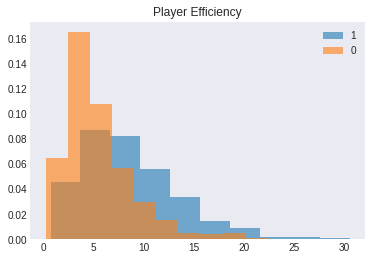

In [ ]:
plt.hist(rookies[rookies["target"]==1].EFF,density =True,alpha = 0.6,label="1")
plt.hist(rookies[rookies["target"]==0].EFF,density =True,alpha = 0.6,label="0")
plt.legend()
plt.title("Player Efficiency")

Text(0.5, 1.0, 'Points Per Game')

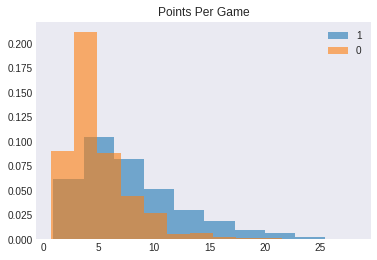

In [ ]:
plt.hist(rookies[rookies["target"]==1].PTS,density =True,alpha = 0.6,label="1")
plt.hist(rookies[rookies["target"]==0].PTS,density =True,alpha = 0.6,label="0")
plt.legend()
plt.title("Points Per Game")

Text(0.5, 1.0, 'Turnovers Per Game')

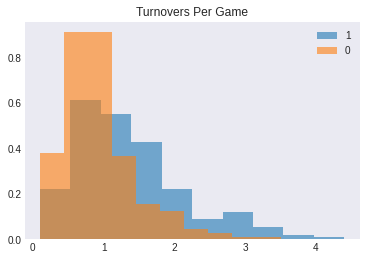

In [ ]:
plt.hist(rookies[rookies["target"]==1].TOV,density =True,alpha = 0.6,label="1")
plt.hist(rookies[rookies["target"]==0].TOV,density =True,alpha = 0.6,label="0")
plt.legend()
plt.title("Turnovers Per Game")

Text(0.5, 1.0, 'Turnovers Per Game')

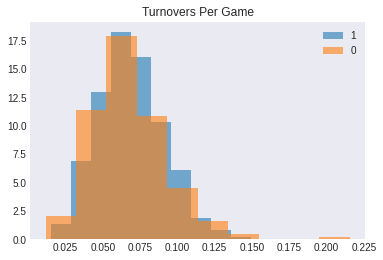

In [ ]:
tpm1 = rookies[rookies["target"]==1].TOV/rookies[rookies["target"]==1].MIN
tpm0 = rookies[rookies["target"]==0].TOV/rookies[rookies["target"]==0].MIN

plt.hist(tpm1,density =True,alpha = 0.6,label="1")
plt.hist(tpm0,density =True,alpha = 0.6,label="0")
plt.legend()
plt.title("Turnovers Per Game")

Text(0.5, 1.0, 'Free-throw Percentage')

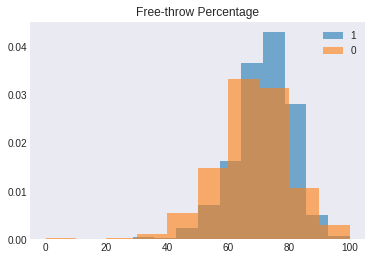

In [ ]:
plt.hist(rookies[rookies["target"]==1]["FT%"],density =True,alpha = 0.6,label="1")
plt.hist(rookies[rookies["target"]==0]["FT%"],density =True,alpha = 0.6,label="0")
plt.legend()
plt.title("Free-throw Percentage")

In [ ]:
#compare target column with year
yr_series = pd.Series(rookies.loc[:, "Year Drafted"])
target_series = pd.Series(rookies.loc[:, "target"])
pd.crosstab(target_series, yr_series)

Year Drafted,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,19,23,24,13,21,16,13,12,18,17,22,20,16,13,14,17,13,15,15,12,14,13,21,14,16,20,20,12,18,11,16,22,19,19
1,24,22,22,25,25,23,27,21,32,32,28,25,29,30,25,23,23,22,23,20,20,24,23,28,24,22,25,25,24,33,26,25,31,25


Text(0, 0.5, 'Count')

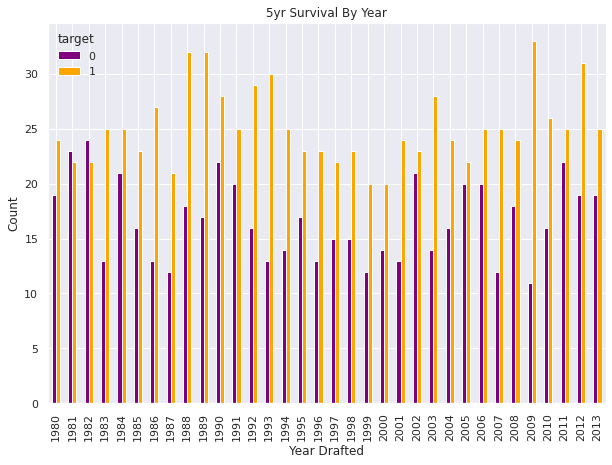

In [ ]:
#visualizing this info
pd.crosstab(yr_series, target_series).plot(kind="bar", figsize=(10,7), color=["purple", "orange"])
plt.title("5yr Survival By Year")
plt.ylabel("Count")

In [ ]:
rookies.head()

,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,target
0,2013,70,34.5,16.7,6.1,15.1,40.5,0.8,3.0,26.4,3.7,5.2,70.3,1.4,4.8,6.2,6.3,1.9,0.6,3.5,17.6,1
1,2013,70,32.3,12.8,4.9,12.8,38.0,1.6,4.8,33,1.5,1.6,90.3,0.5,2.4,3.0,5.7,0.6,0.1,1.9,12.1,1
2,2013,80,31.1,13.8,4.9,11.7,41.9,0.9,2.8,32.7,3.1,4.0,78.0,0.5,3.6,4.1,4.1,1.6,0.5,3.2,13.2,1
3,2013,82,26.7,8.8,3.1,8.3,37.6,1.2,3.6,32,1.4,1.7,80.4,0.6,2.2,2.9,1.0,0.6,0.2,1.2,6.7,1
4,2013,77,24.6,6.8,2.2,5.4,41.4,0.5,1.5,34.7,1.8,2.6,68.3,1.0,3.4,4.4,1.9,0.8,0.8,1.6,9.1,1


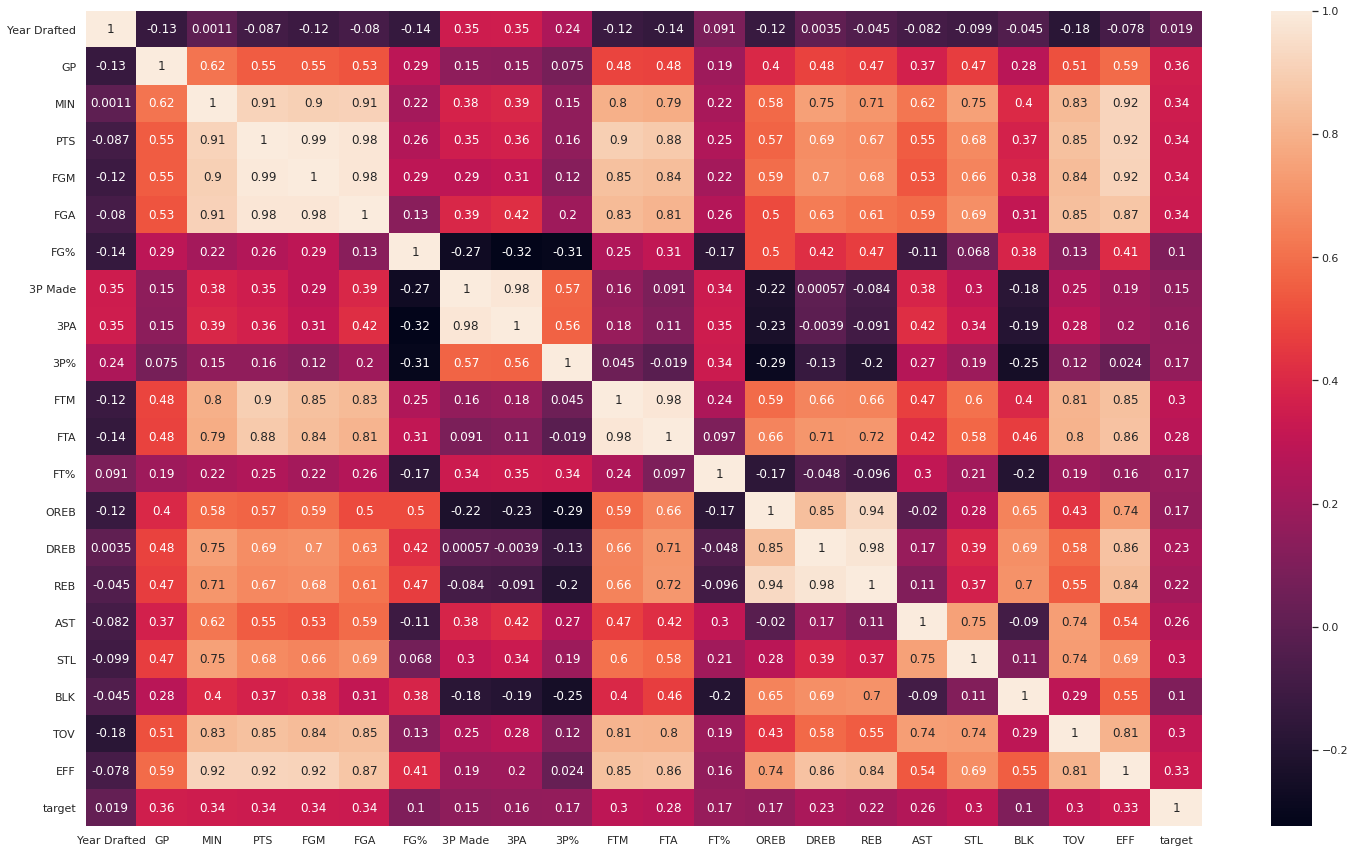

In [ ]:
#Correlaton matrix
corr_matrix = rookies.corr()
fig, ax = plt.subplots(figsize=(25,15))
ax = sns.heatmap(corr_matrix, annot=True)

In [ ]:
#Cleaning the 3P% column
rookies["3P%"] = rookies["3P%"].map(lambda x:0 if x=="-" else x)

In [ ]:
#Creating Matrix of Features
X = rookies.drop(["target"], axis = 1)

In [ ]:
X

,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,2013,70,34.5,16.7,6.1,15.1,40.5,0.8,3.0,26.4,3.7,5.2,70.3,1.4,4.8,6.2,6.3,1.9,0.6,3.5,17.6
1,2013,70,32.3,12.8,4.9,12.8,38.0,1.6,4.8,33.0,1.5,1.6,90.3,0.5,2.4,3.0,5.7,0.6,0.1,1.9,12.1
2,2013,80,31.1,13.8,4.9,11.7,41.9,0.9,2.8,32.7,3.1,4.0,78.0,0.5,3.6,4.1,4.1,1.6,0.5,3.2,13.2
3,2013,82,26.7,8.8,3.1,8.3,37.6,1.2,3.6,32.0,1.4,1.7,80.4,0.6,2.2,2.9,1.0,0.6,0.2,1.2,6.7
4,2013,77,24.6,6.8,2.2,5.4,41.4,0.5,1.5,34.7,1.8,2.6,68.3,1.0,3.4,4.4,1.9,0.8,0.8,1.6,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,1980,59,10.1,3.2,1.4,3.1,45.4,0.0,0.1,0.0,0.4,0.7,56.4,0.5,0.6,1.0,1.2,0.6,0.1,1.3,2.8
1420,1980,47,9.6,2.0,0.7,2.0,35.8,0.0,0.1,0.0,0.5,0.7,78.1,0.2,0.7,0.9,1.5,0.5,0.0,0.6,2.9
1421,1980,60,8.9,2.8,1.0,3.0,33.0,0.0,0.1,0.0,0.9,1.2,73.9,0.5,0.7,1.2,1.3,0.4,0.0,0.6,2.7
1422,1980,55,8.4,2.7,1.0,2.5,41.2,0.0,0.1,0.0,0.7,1.5,43.5,0.5,1.2,1.7,0.3,0.4,0.4,0.6,2.6


In [ ]:
#creating target column
y = rookies.loc[:, "target"]
y

0       1
1       1
2       1
3       1
4       1
       ..
1419    0
1420    1
1421    0
1422    0
1423    0
Name: target, Length: 1424, dtype: int64

In [ ]:
# Splitting into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1139, 21) (1139,)
(285, 21) (285,)


In [134]:
# Models dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
          "Neural Network": MLPClassifier()}

#Function that will evaluate the model performance using various metrics
def evaluate_pred(y_pred, y_test):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metric_dict = {"accuracy": round(accuracy, 2), "precision": round(precision, 2), "recall": round(recall, 2),
                  "f1": round(f1,2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

# Function that will fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    #Dictionary of model scores
    model_scores = {}
    
    #Loop through models
    for name, model in models.items():
        clf = model
        clf.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [135]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'KNN': 0.6771929824561403,
 'Logistic Regression': 0.7333333333333333,
 'Neural Network': 0.6105263157894737,
 'Random Forest': 0.7263157894736842}

In [ ]:
# Create hyperparameter options
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

# Apply grid search
log_clf = GridSearchCV(LogisticRegression(), grid, cv=5, verbose=0)

#Fit
log_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#print the best estimator
log_clf.best_estimator_

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#evaluating the performance of the best estimator
log_clf1 = LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
log_clf1.fit(X_train, y_train)
y_pred = log_clf1.predict(X_test)
accuracy_score(y_pred, y_test)

0.7368421052631579

In [ ]:
comp = y_test[y_test != y_pred]
rk.loc[comp.index]["Name"].values.tolist()

['Emeka Okafor',
 'Malik Rose',
 'Peja Stojakovic',
 'Milt Wagner',
 'Charlie Villanueva',
 'Jacque Vaughn',
 'Billy Thomas',
 'Jim Thomas',
 'Chris Mihm',
 'Georgi Glouchkov',
 'Sidney Green',
 'Alexey Shved',
 'Monty Williams',
 'Raul Lopez',
 'Chris Crawford',
 'Duane Ferrell',
 'Carlos Boozer',
 'Petur Gudmundsson',
 'DeAndre Jordan',
 'Juaquin Hawkins',
 'Lorenzo Williams',
 'Dirk Minniefield',
 'Tim Hardaway Jr.',
 'Dan Schayes',
 'Steve Henson',
 'Andy Toolson',
 'Eric Murdock',
 'William Avery',
 'Kevin Duckworth',
 'Marty Conlon',
 'Jorge Garbajosa',
 'Leandro Barbosa',
 'Fabricio Oberto',
 'Jeff Withey',
 'Sylvester Gray',
 'Delonte West',
 'Dajuan Wagner',
 'Darvin Ham',
 'Phil Pressey',
 'Jonas Valanciunas',
 'Serge Ibaka',
 'Ersan Ilyasova',
 'Michael Smith',
 'Shabazz Muhammad',
 'Duane Cooper',
 'Jeff Taylor',
 'Walter Herrmann',
 'Micheal Williams',
 'Dino Radja',
 'Archie Goodwin',
 'Matthew Dellavedova',
 'Dwayne Washington',
 'Hanno Mottola',
 'Brook Lopez',
 'Keon C

In [ ]:
comp2 = y_test[y_test == y_pred]
rk.loc[comp2.index]

,Name,Year Drafted,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,target
1044,Mitch Richmond,1988,79,34.4,22.0,8.2,17.5,46.8,0.4,1.1,36.7,5.2,6.4,81.0,2.0,3.9,5.9,4.2,1.0,0.2,3.4,19.4,1
1339,Tom Chambers,1981,81,33.1,17.2,6.8,13.0,52.5,0.0,0.0,0,3.5,5.7,62.0,2.6,4.3,6.9,1.8,0.7,0.6,2.7,16.1,1
1283,Larry Micheaux,1983,39,8.5,3.1,1.3,2.3,54.4,0.0,0.0,0,0.5,1.0,53.8,1.0,1.9,2.9,0.5,0.5,0.3,0.5,5.2,0
141,Blake Griffin,2010,82,38.0,22.5,8.5,16.8,50.6,0.1,0.3,29.2,5.4,8.5,64.2,3.3,8.8,12.1,3.8,0.8,0.6,2.7,25.6,1
1261,Byron Scott,1983,74,22.1,10.6,4.5,9.3,48.4,0.1,0.5,23.5,1.5,1.9,80.6,0.7,1.5,2.2,2.4,1.1,0.3,1.6,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Andrea Bargnani,2006,65,25.1,11.6,4.1,9.6,42.7,1.5,4.1,37.3,1.8,2.2,82.4,0.8,3.1,3.9,0.8,0.5,0.8,1.6,10.0,1
408,Matt Bonner,2004,82,18.9,7.2,3.0,5.6,53.3,0.5,1.1,42.4,0.7,0.9,78.9,1.3,2.2,3.5,0.6,0.5,0.2,0.5,8.6,1
528,Gilbert Arenas,2001,47,24.6,10.9,3.7,8.2,45.3,0.8,2.4,34.5,2.6,3.4,77.5,0.9,1.9,2.8,3.7,1.5,0.2,2.1,11.8,1
302,Oleksiy Pecherov,2007,35,9.1,3.6,1.3,3.6,35.2,0.5,1.7,28.3,0.6,0.9,64.5,0.6,1.3,1.9,0.2,0.2,0.1,0.5,2.9,0


In [ ]:
#Desired range for k parameter
k_range = list(range(19, 50))

#Creating grid
param_grid = dict(n_neighbors=k_range)

#Applying GridSearchCV
knn_clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
knn_clf.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
                                         29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
                                         39, 40, 41, 42, 43, 44, 45, 46, 47, 48, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
#printing best estimator
knn_clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

In [ ]:
#evaluating the performance of the best estimator
knn_clf1 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')
knn_clf1.fit(X_train, y_train)
y_pred = knn_clf1.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.7333333333333333


In [ ]:
#Creating the grid
param_grid = {
    'n_estimators'      : range(50,200,10),
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0],
    #'max_features': ['auto'],
    #'criterion' :['gini']
}

#Applying grid search
cv_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 10, scoring='accuracy')
cv_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
#printing best estimator
cv_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# #evaluating performance of best estimator
rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=340,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_pred, y_test)

0.7298245614035088

In [ ]:
p_grid = {

}
cv_nn = GridSearchCV(estimator=MLPClassifier(), param_grid=p_grid, cv= 10, scoring='accuracy')
cv_nn.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={},
        

In [ ]:
cv_nn.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes = (100), activation = 'logistic', solver = 'adam', verbose = 1, max_iter = 500)
nn.fit(X_train,y_train)
y_prednn = nn.predict(X_test)
# output accuracy metric for NN model
accuracy_score(y_prednn, y_test)

Iteration 1, loss = 0.66857560
Iteration 2, loss = 0.65983674
Iteration 3, loss = 0.65707358
Iteration 4, loss = 0.65574548
Iteration 5, loss = 0.65390724
Iteration 6, loss = 0.65010913
Iteration 7, loss = 0.64914009
Iteration 8, loss = 0.64827824
Iteration 9, loss = 0.64679010
Iteration 10, loss = 0.64252044
Iteration 11, loss = 0.64278645
Iteration 12, loss = 0.63948076
Iteration 13, loss = 0.63734498
Iteration 14, loss = 0.63547045
Iteration 15, loss = 0.63457087
Iteration 16, loss = 0.63210144
Iteration 17, loss = 0.62854198
Iteration 18, loss = 0.62712269
Iteration 19, loss = 0.62323851
Iteration 20, loss = 0.62219521
Iteration 21, loss = 0.62142941
Iteration 22, loss = 0.61766496
Iteration 23, loss = 0.61434751
Iteration 24, loss = 0.61318695
Iteration 25, loss = 0.61370432
Iteration 26, loss = 0.61242640
Iteration 27, loss = 0.60873541
Iteration 28, loss = 0.60753316
Iteration 29, loss = 0.60486416
Iteration 30, loss = 0.60465194
Iteration 31, loss = 0.60352266
Iteration 32, los

0.7333333333333333

In [ ]:
compnn = y_test[y_test != y_pred]
rk.loc[compnn.index]["Name"].values.tolist()

['Emeka Okafor',
 'Malik Rose',
 'Peja Stojakovic',
 'Milt Wagner',
 'Charlie Villanueva',
 'Billy Thomas',
 'Jim Thomas',
 'Chris Mihm',
 'Sidney Green',
 'Alexey Shved',
 'Sean Singletary',
 'Monty Williams',
 'Raul Lopez',
 'Chris Crawford',
 'Duane Ferrell',
 'Carlos Boozer',
 'Petur Gudmundsson',
 'Ron Anderson',
 'DeAndre Jordan',
 'Gheorghe Muresan',
 'Juaquin Hawkins',
 'Lorenzo Williams',
 'Dirk Minniefield',
 'Pace Mannion',
 'Tim Hardaway Jr.',
 'Eric Leckner',
 'Dan Schayes',
 'Steve Henson',
 'William Avery',
 'Kevin Duckworth',
 'Marty Conlon',
 'Jorge Garbajosa',
 'Leandro Barbosa',
 'Fabricio Oberto',
 'Jeff Withey',
 'Sylvester Gray',
 'Delonte West',
 'Dajuan Wagner',
 'Steven Adams',
 'Darvin Ham',
 'Phil Pressey',
 'Michael Anderson',
 'Serge Ibaka',
 'Ersan Ilyasova',
 'John Battle',
 'Michael Smith',
 'Shabazz Muhammad',
 'Duane Cooper',
 'Jeff Taylor',
 'Walter Herrmann',
 'Andre Drummond',
 'Dino Radja',
 'Archie Goodwin',
 'Matthew Dellavedova',
 'Dwayne Washin

## CV model evaluation

In [ ]:
#Function that creates visualization for confusion matrix
sns.set(font_scale=1.0)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

In [ ]:
#function that calculates classification metrics using cross validation
cv_metrics = ["accuracy", "precision", "recall", "f1"]
def cv_calculator(cv_metrics, clf, X, y):
    cv_dict = {}
    for metric in cv_metrics:
        cv_dict[metric] = np.mean(cross_val_score(clf, X, y, cv=5, scoring=metric))
    return cv_dict

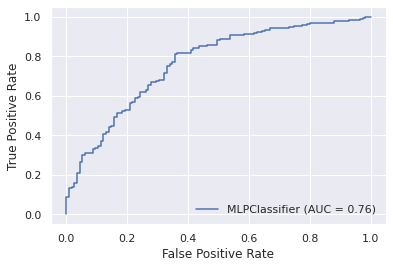

In [ ]:
plot_roc_curve(nn, X_test, y_test)

In [ ]:
cv_dictnn = cv_calculator(cv_metrics, nn, X, y)
cv_dictnn

Iteration 1, loss = 0.71498472
Iteration 2, loss = 0.67632576
Iteration 3, loss = 0.66952271
Iteration 4, loss = 0.66936022
Iteration 5, loss = 0.66855697
Iteration 6, loss = 0.66664479
Iteration 7, loss = 0.66551945
Iteration 8, loss = 0.66479409
Iteration 9, loss = 0.66420187
Iteration 10, loss = 0.66249764
Iteration 11, loss = 0.66098775
Iteration 12, loss = 0.65893621
Iteration 13, loss = 0.65714376
Iteration 14, loss = 0.65536548
Iteration 15, loss = 0.65195831
Iteration 16, loss = 0.64771872
Iteration 17, loss = 0.64421806
Iteration 18, loss = 0.63750875
Iteration 19, loss = 0.63511301
Iteration 20, loss = 0.63177735
Iteration 21, loss = 0.62824903
Iteration 22, loss = 0.62299247
Iteration 23, loss = 0.61825756
Iteration 24, loss = 0.61474907
Iteration 25, loss = 0.61192170
Iteration 26, loss = 0.61727648
Iteration 27, loss = 0.61373862
Iteration 28, loss = 0.61387835
Iteration 29, loss = 0.60420066
Iteration 30, loss = 0.60454681
Iteration 31, loss = 0.60226506
Iteration 32, los

{'accuracy': 0.6847047195453422,
 'f1': 0.7599616730272281,
 'precision': 0.7236869105589477,
 'recall': 0.7628790969672242}

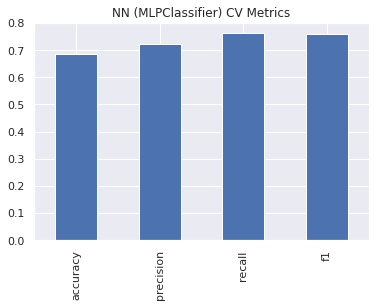

In [ ]:
cv_metricsnn = pd.DataFrame(cv_dictnn, index=["score"])
cv_metricsnn.T.plot.bar(title="NN (MLPClassifier) CV Metrics", legend=False)

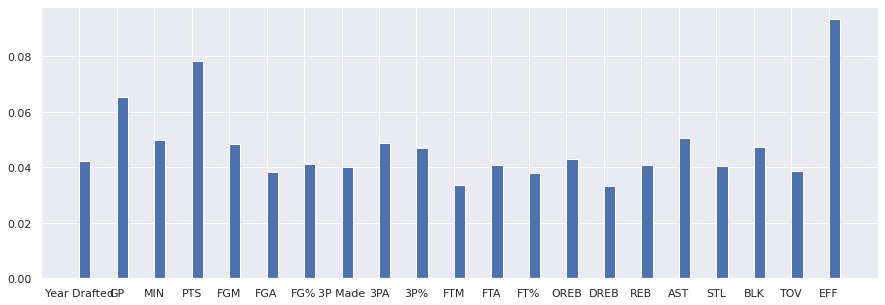

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(list(X_train.columns), xg_clf1.feature_importances_, align='edge', width=0.3)
plt.show()

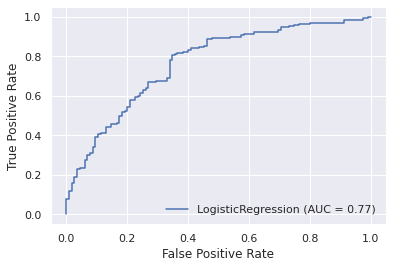

In [ ]:
plot_roc_curve(log_clf1, X_test, y_test)

In [ ]:
cv_dict2 = cv_calculator(cv_metrics, log_clf, X, y)
cv_dict2

{'accuracy': 0.6868050407709415,
 'f1': 0.7502609060758395,
 'precision': 0.720454010137282,
 'recall': 0.7838909288725691}

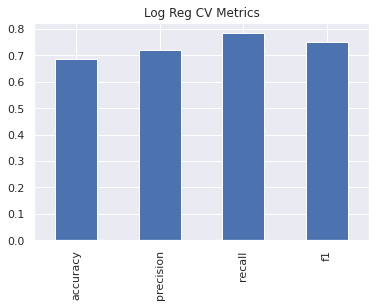

In [ ]:
#visualize the cv metrics
cv_metrics2 = pd.DataFrame(cv_dict2, index=["score"])
cv_metrics2.T.plot.bar(title="Log Reg CV Metrics", legend=False)

<Figure size 1080x360 with 0 Axes>

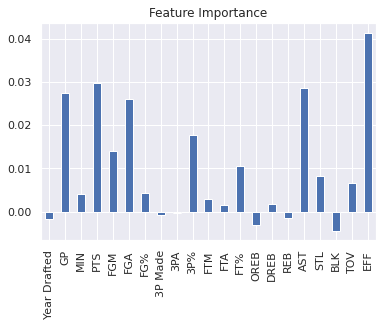

In [ ]:
#feature importance log reg#

#Match coefficients to corresponding columns
feature_dict = dict(zip(rookies.columns, list(log_clf1.coef_[0])))

#Visualize feature importance
plt.figure(figsize=(15, 5))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

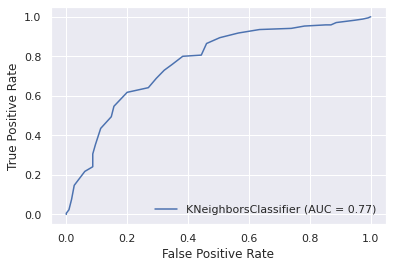

In [ ]:
plot_roc_curve(knn_clf1, X_test, y_test)

In [ ]:
#cross validated classification metrics for KNN
cv_dict3 = cv_calculator(cv_metrics, knn_clf1, X, y)
cv_dict3

{'accuracy': 0.6854015319990117,
 'f1': 0.750884736713976,
 'precision': 0.7167946069562895,
 'recall': 0.7896640826873386}

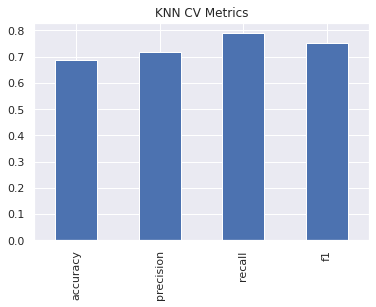

In [ ]:
#visualize the cv metrics
cv_metrics3 = pd.DataFrame(cv_dict3, index=["score"])
cv_metrics3.T.plot.bar(title="KNN CV Metrics", legend=False)

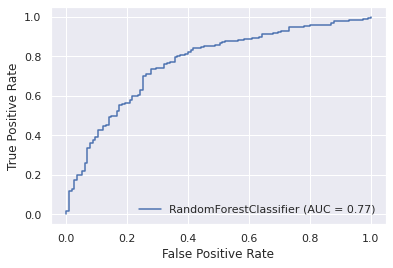

In [ ]:
plot_roc_curve(rfc, X_test, y_test)

In [ ]:
#cross validated classification metrics RF
cv_dict4 = cv_calculator(cv_metrics, rfc, X, y)
cv_dict4

{'accuracy': 0.6678329626884112,
 'f1': 0.7204525593050363,
 'precision': 0.7333230318195458,
 'recall': 0.7207738338093296}

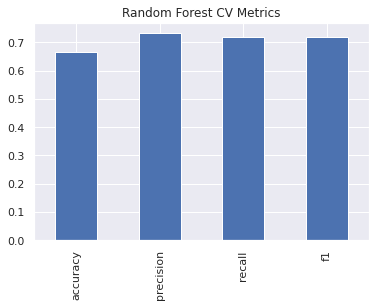

In [ ]:
#visualize the cv metrics
cv_metrics4 = pd.DataFrame(cv_dict4, index=["score"])
cv_metrics4.T.plot.bar(title="Random Forest CV Metrics", legend=False)

<Figure size 1080x360 with 0 Axes>

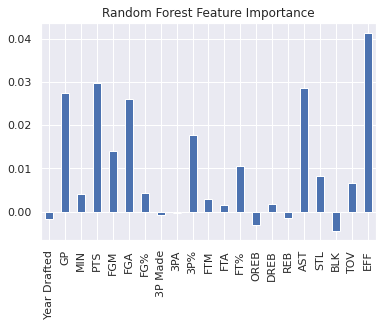

In [ ]:
#feature importance for random forest#

#creating feature importance dictionary
features_dict2 = dict(zip(rookies.columns , rfc.feature_importances_))

#visualizing feature importance
plt.figure(figsize=(15, 5))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Random Forest Feature Importance", legend=False)